Import Libraries

In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\daksh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\daksh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\daksh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
from nltk.tokenize import sent_tokenize,word_tokenize

Webscrape an article

In [3]:
from newspaper import Article
 
url = "https://www.livemint.com/news/india/maharashtra-revises-covid-restrictions-salons-gyms-to-function-with-50-capacity-11641721348539.html"
# download and parse article
article = Article(url)
article.download()
article.parse()
 
#Keep only the text
article2 = article.text

Named Entity Recognition with nltk

In [4]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article2)

In [5]:
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [6]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

In [19]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

In [8]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Maharashtra/NNP)
(NE Beauty/NNP)
(NE Maharashtra/NNP)
(NE Schools/NNP)
(NE Maharashtra/NNP)
(NE Maharashtra/NNP)
(NE Home/NN)
(NE Maharashtra/NNP)
(NE Omicron/NNP)
(NE Indian/JJ Institute/NNP)
(NE Science/NNP Education/NNP)
(NE Gujarat/NNP)
(NE Omicron/NNP)
(NE Pune/NNP)
(NE Pune/NNP)
(NE Ahmednagar/NNP)
(NE Mumbai/NNP)
(NE Mumbai/NNP)
(NE Pune/NNP)
(NE Subscribe/NNP)
(NE Mint/NNP Newsletters/NNP)


Charting the data

In [10]:
# Create the defaultdict: ner_categories
ner_categories = {}


In [11]:
# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

In [12]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

Create a Piechart

<ipython-input-15-64e88595858e>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)


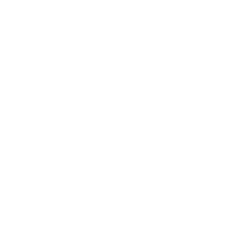

In [15]:
import matplotlib.pyplot as plt